In [4]:
# import librabiry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
airbnb_df = pd.read_csv("C:/Users/shiva/Downloads/AB_NYC_2019.csv")

Data PreProcessing

In [6]:
airbnb_df.shape

(48895, 16)

In [7]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Replace Null Value with Columns mean value(numerical)

In [9]:
ncol = airbnb_df.select_dtypes(include = ['int64','float']).columns
len(ncol)

10

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
airbnb_df[ncol].isnull().any().sum()

1

Replace Null value with column median value(catogorical)

In [11]:
objCol = airbnb_df.select_dtypes(include = ['object']).columns
objCol

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

In [12]:
airbnb_df[objCol].isnull().any().sum()

3

In [13]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

In [14]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
airbnb_df.shape

(48895, 16)

Encoding the Data

In [16]:
for i in objCol:
    print(airbnb_df[i].unique())

['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]
['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Fina

In [17]:
ds = pd.get_dummies(data = airbnb_df, columns = objCol,drop_first=True)

In [18]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Exploratory Data Analysis

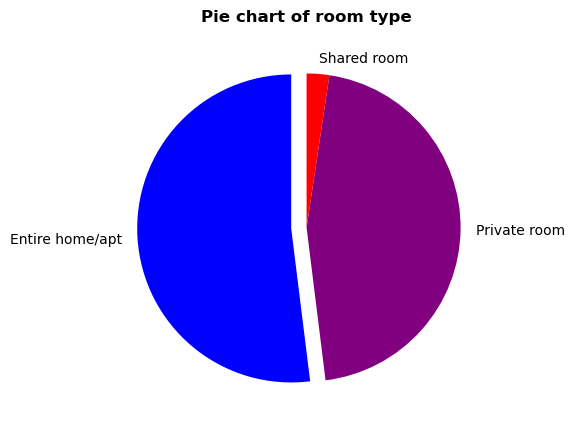

Timer:-  0.520266699953936


In [19]:
from timeit import default_timer as timer
start = timer()
room_type = airbnb_df.room_type.value_counts()
room_type.plot(kind='pie', figsize=(5,5), title='Most frequent room types', fontsize=10, explode=(0.1,0,0), startangle=90, colors=['blue','purple','red'])
plt.title('Pie chart of room type', fontweight='bold', pad=10)
plt.ylabel(" ")
plt.show()
print("Timer:- ", timer() - start)

The Most Common neighborhood group

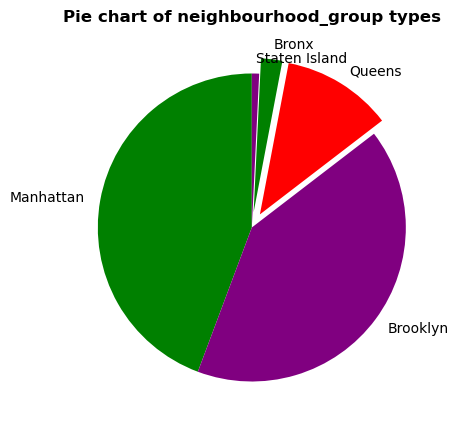

Timer:-  0.23542179993819445


In [20]:
from timeit import default_timer as timer
start = timer()
neighbourhood_Group = airbnb_df.neighbourhood_group.value_counts()
neighbourhood_Group.plot(kind='pie', figsize=(5,5), 
                         title='Most frequent neighbourhood_group types',
                         fontsize=10, explode=(0,0,0.1,0.1,0), 
                         startangle=90, colors=['green','purple','red'])
plt.title('Pie chart of neighbourhood_group types', fontweight='bold', pad=10)
plt.ylabel(" ")
plt.show()
print("Timer:- ", timer() - start)

Neighbourhood_group

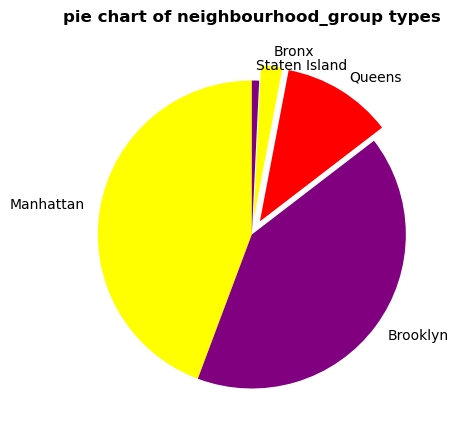

Timer =  0.26720110001042485


In [21]:
from timeit import default_timer as timer
start = timer()
neighbourhood_Group = airbnb_df.neighbourhood_group.value_counts()
neighbourhood_Group.plot(kind='pie',figsize=(5,5), title='Most frequent neighbourhood',
                         fontsize=10, explode=(0,0,0.1,0.1,0), 
                         startangle=90, colors=['yellow','purple','red'])
plt.title('pie chart of neighbourhood_group types',fontweight='bold',pad=15)
plt.ylabel(" ")
plt.show()
print("Timer = ",timer() - start)

 Host ids vs the number of airbnbs that under each of the hosts

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64
Timer:-  0.12747920001856983


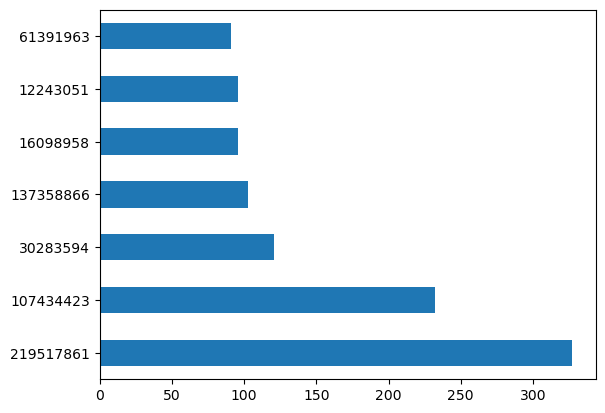

In [22]:
from timeit import default_timer as timer
start = timer()
hi = airbnb_df.host_id.value_counts().head(10)
print(hi)
airbnb_df.host_id.value_counts().head(7).plot(kind='barh')
print("Timer:- ", timer() - start)

Neighbourhood group wise distribution of airbnb

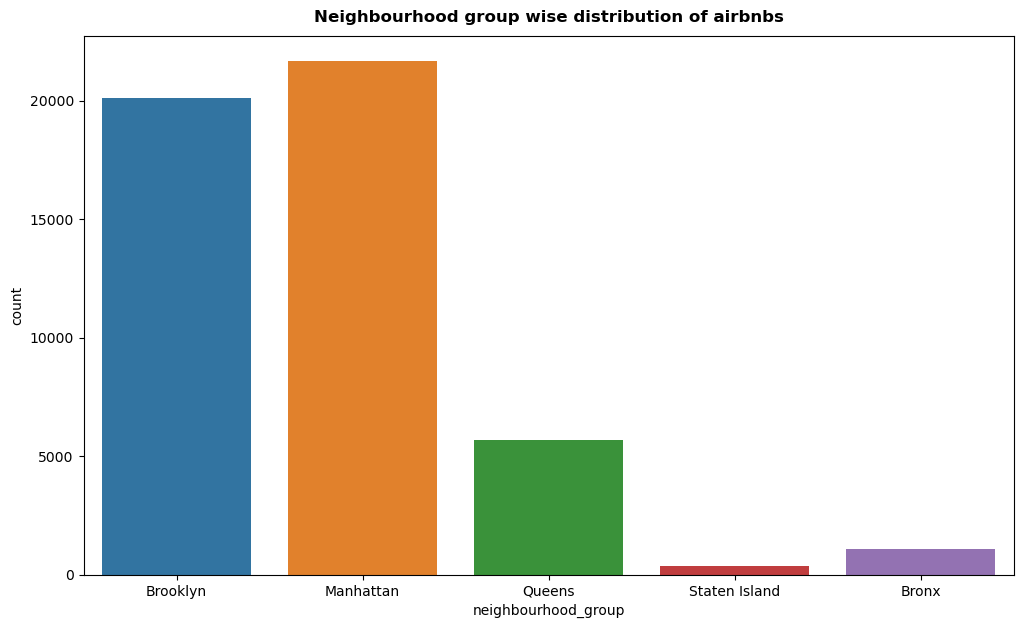

Timer:-  0.48002909997012466


In [23]:
from timeit import default_timer as timer
start = timer()
plt.figure(figsize=(12,7))
sns.countplot(x='neighbourhood_group', data=airbnb_df)
plt.title('Neighbourhood group wise distribution of airbnbs', fontweight='bold', pad=10)
plt.show()
print("Timer:- ", timer() - start)

Room type distribution of airbnb

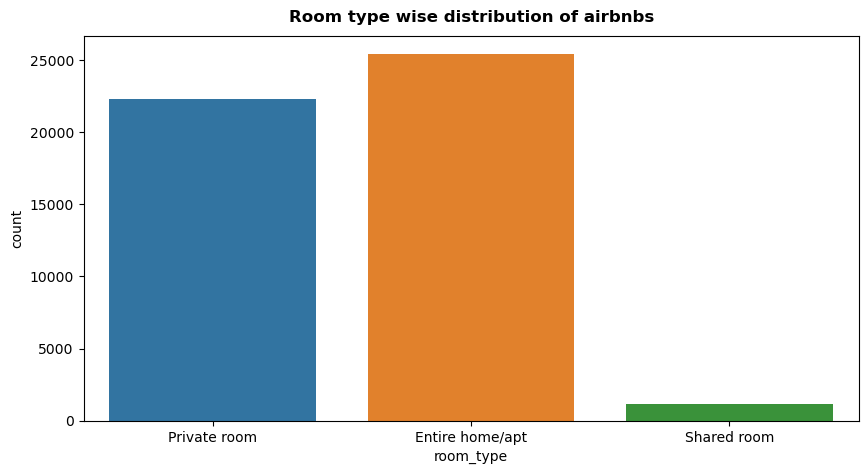

Timer:-  0.33476310002151877


In [24]:
from timeit import default_timer as timer
start = timer()
plt.figure(figsize=(10,5))
sns.countplot(x='room_type', data=airbnb_df)
plt.title('Room type wise distribution of airbnbs',
          fontweight='bold', pad=10)
plt.show()
print("Timer:- ", timer() - start)

Top 5 and Top 10 most reviewed neighbourhoods

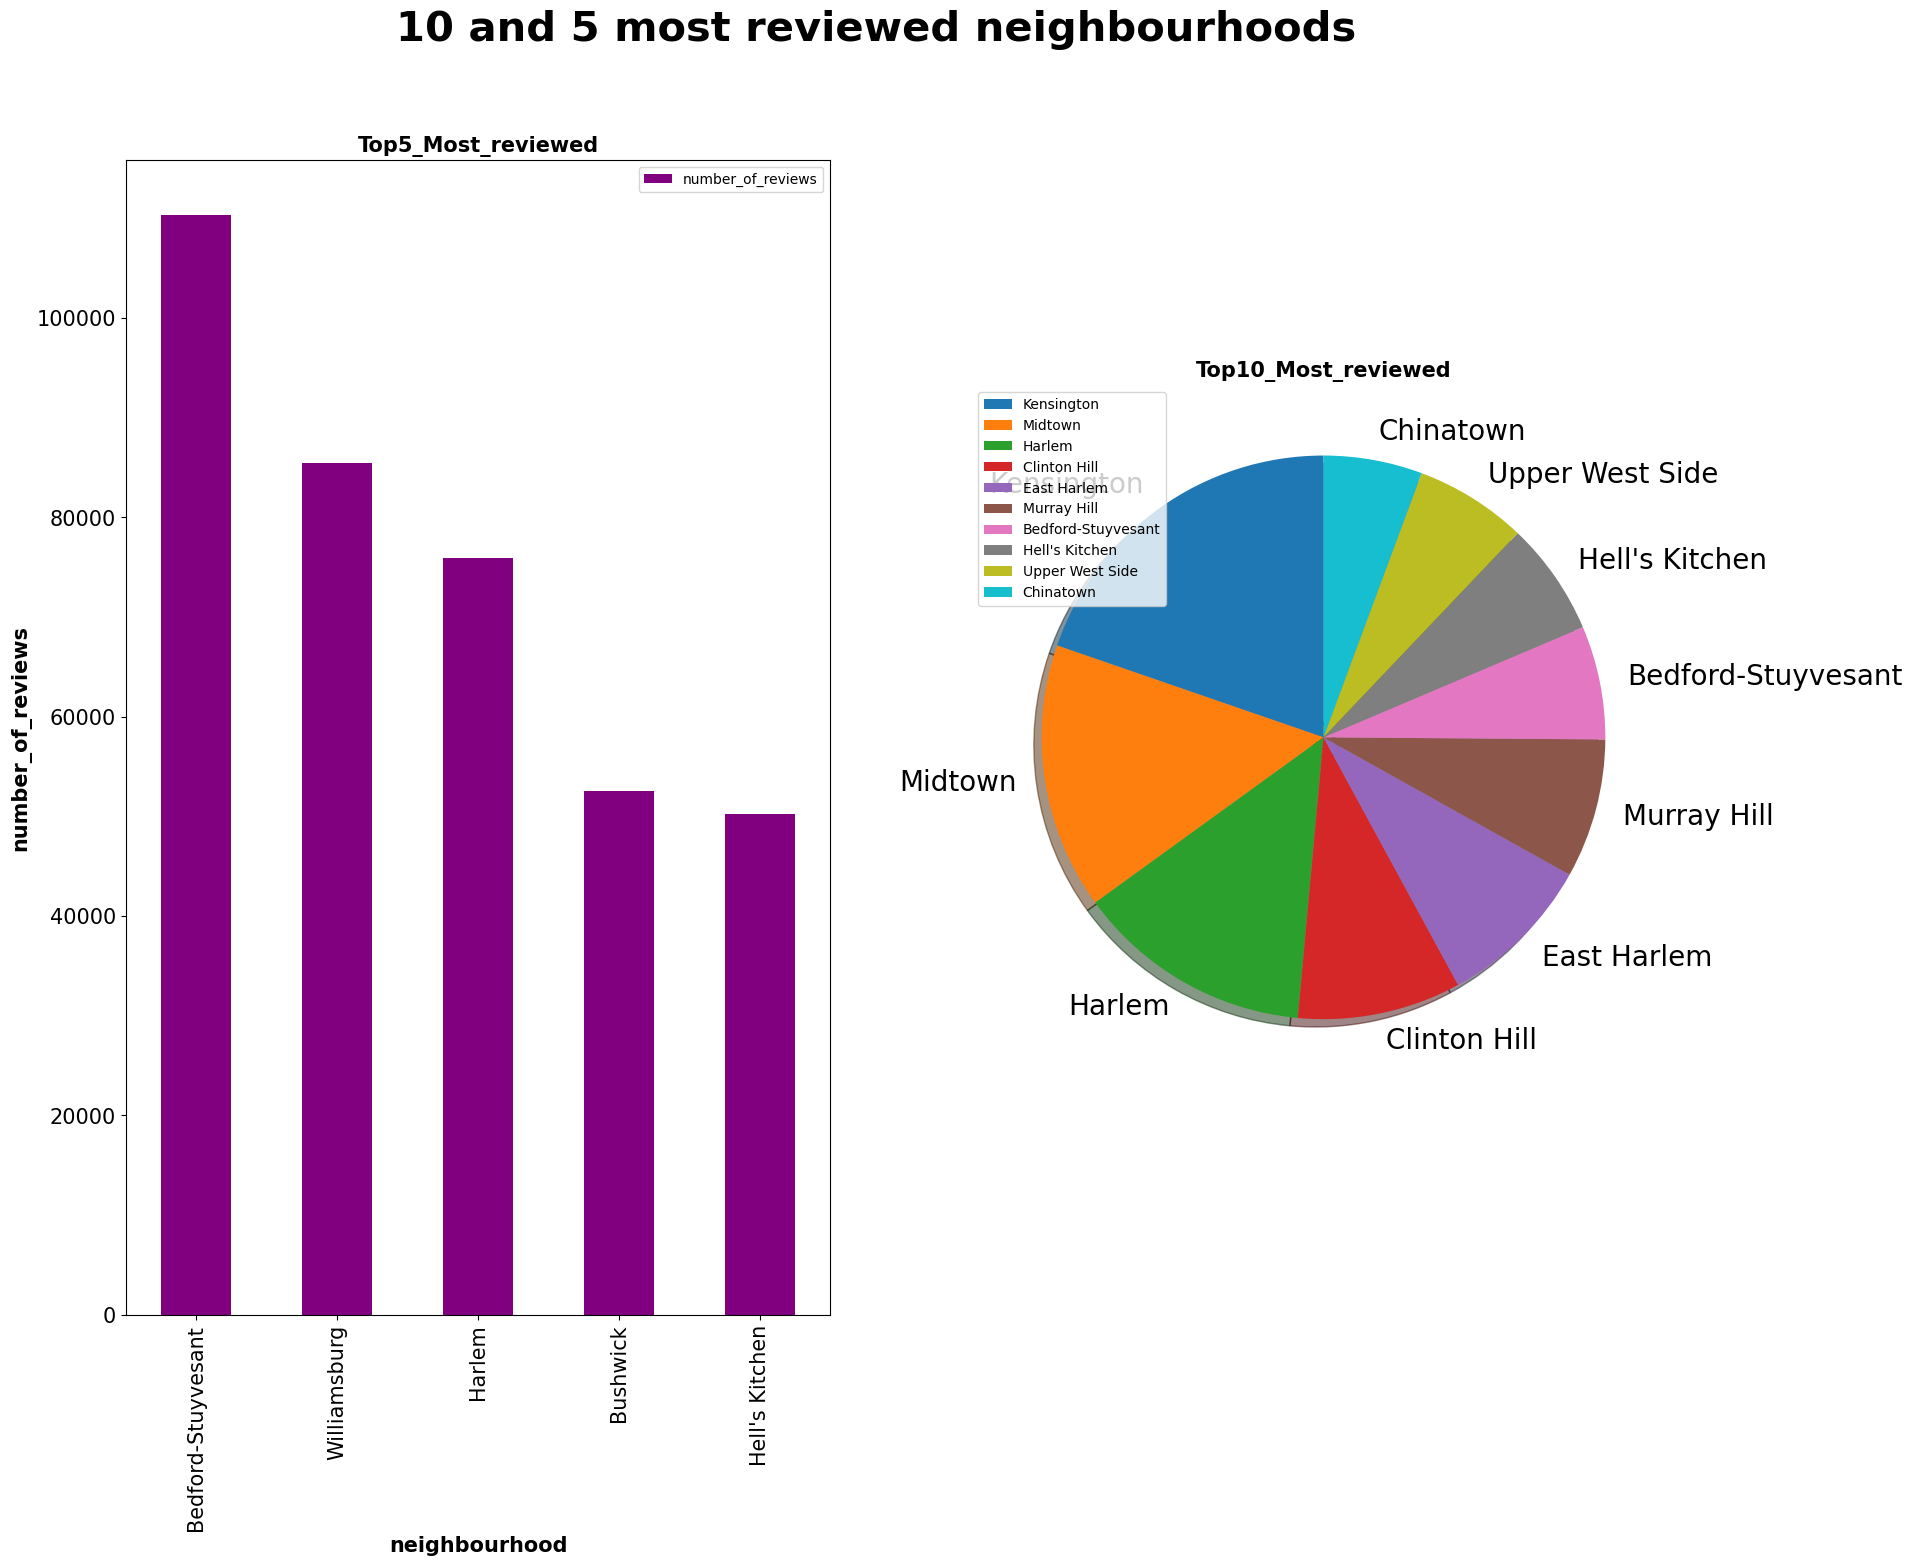

In [25]:
review_df = airbnb_df[['neighbourhood', 'number_of_reviews']].groupby ('neighbourhood', as_index=False).sum()
review = review_df.sort_values(['number_of_reviews'], ascending=False)

explode = (0.1,0.1,0.1,0.1,0.1,0,0,0,0,0)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('10 and 5 most reviewed neighbourhoods', fontweight='bold', fontsize=30)

### Top5
review.head(5).plot.bar(x='neighbourhood', y='number_of_reviews', color='purple', figsize=(40,25), fontsize=15, ax=ax1)
ax1.set_title('Top5_Most_reviewed', fontweight='bold', fontsize=15)
ax1.set_xlabel('neighbourhood', fontweight='bold', fontsize=15)
ax1.set_ylabel('number_of_reviews', fontweight='bold', fontsize=15)

### Top10
review.head(10).plot(kind='pie', x='neighbourhood',
                     y='number_of_reviews',
                     figsize=(20,15), fontsize=20, startangle=90, 
                     shadow=True, labels=airbnb_df.neighbourhood,
                     ax=ax2)
ax2.set_title('Top10_Most_reviewed', fontweight='bold', fontsize=15)
ax2.set_xlabel(' ')
ax2.set_ylabel(' ')

fig.subplots_adjust(hspace=1.0)

Category count plot between room type and neighborhood group

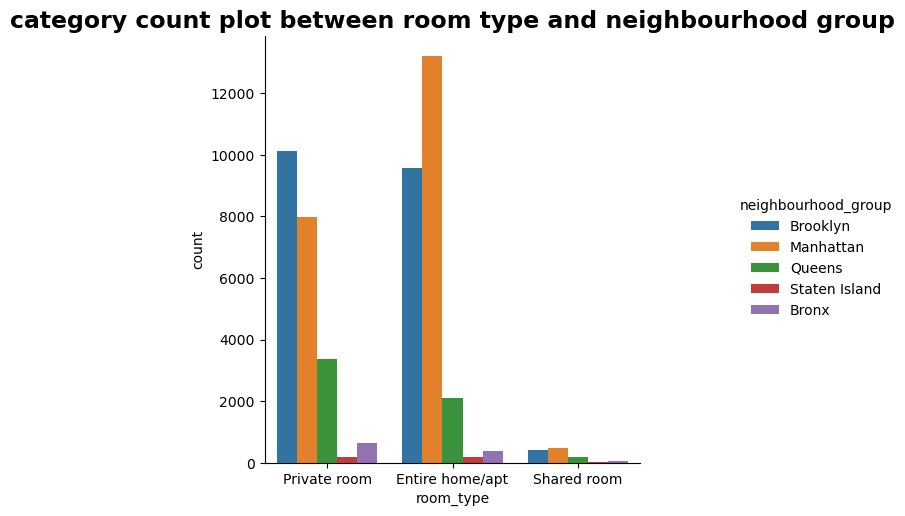

In [26]:
import seaborn as sns
sns.catplot(x='room_type',kind='count',hue='neighbourhood_group',data=airbnb_df)
plt.title('category count plot between room type and neighbourhood group',
         fontweight='bold',fontsize=17)
plt.show()

Most Expensive Room Type

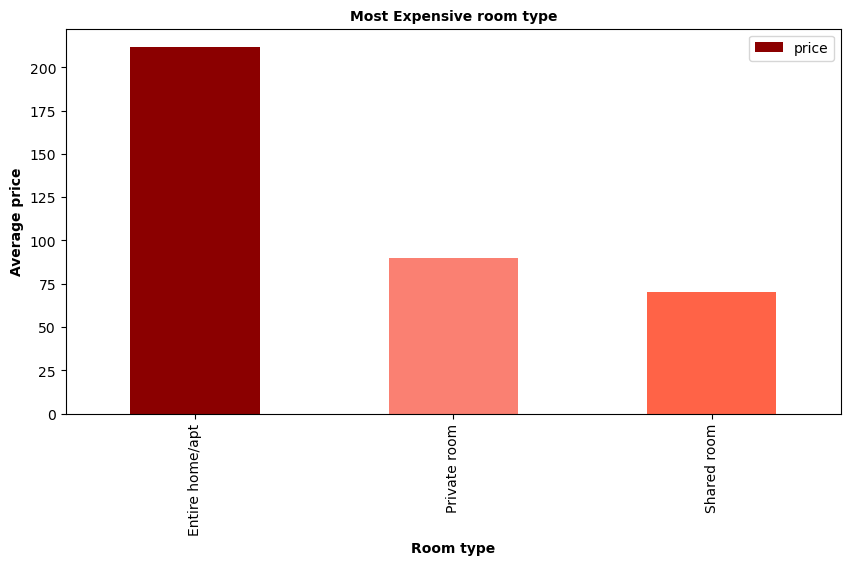

In [29]:
room_type_df1 = airbnb_df[['room_type','id','price']]
room_type = room_type_df1.groupby(by=['room_type'],as_index=False).agg({'price':'mean'}).sort_values('price',ascending=False, ignore_index=True)
room_type.plot(kind='bar', x='room_type', y='price', color=['darkred','salmon','tomato'],figsize=(10,5),fontsize=10)
plt.title('Most Expensive room type',fontweight='bold',fontsize=10)
plt.xlabel('Room type',fontweight='bold',fontsize=10)
plt.ylabel('Average price',fontweight='bold',fontsize=10)
plt.show()

Neighborhood with the most entries

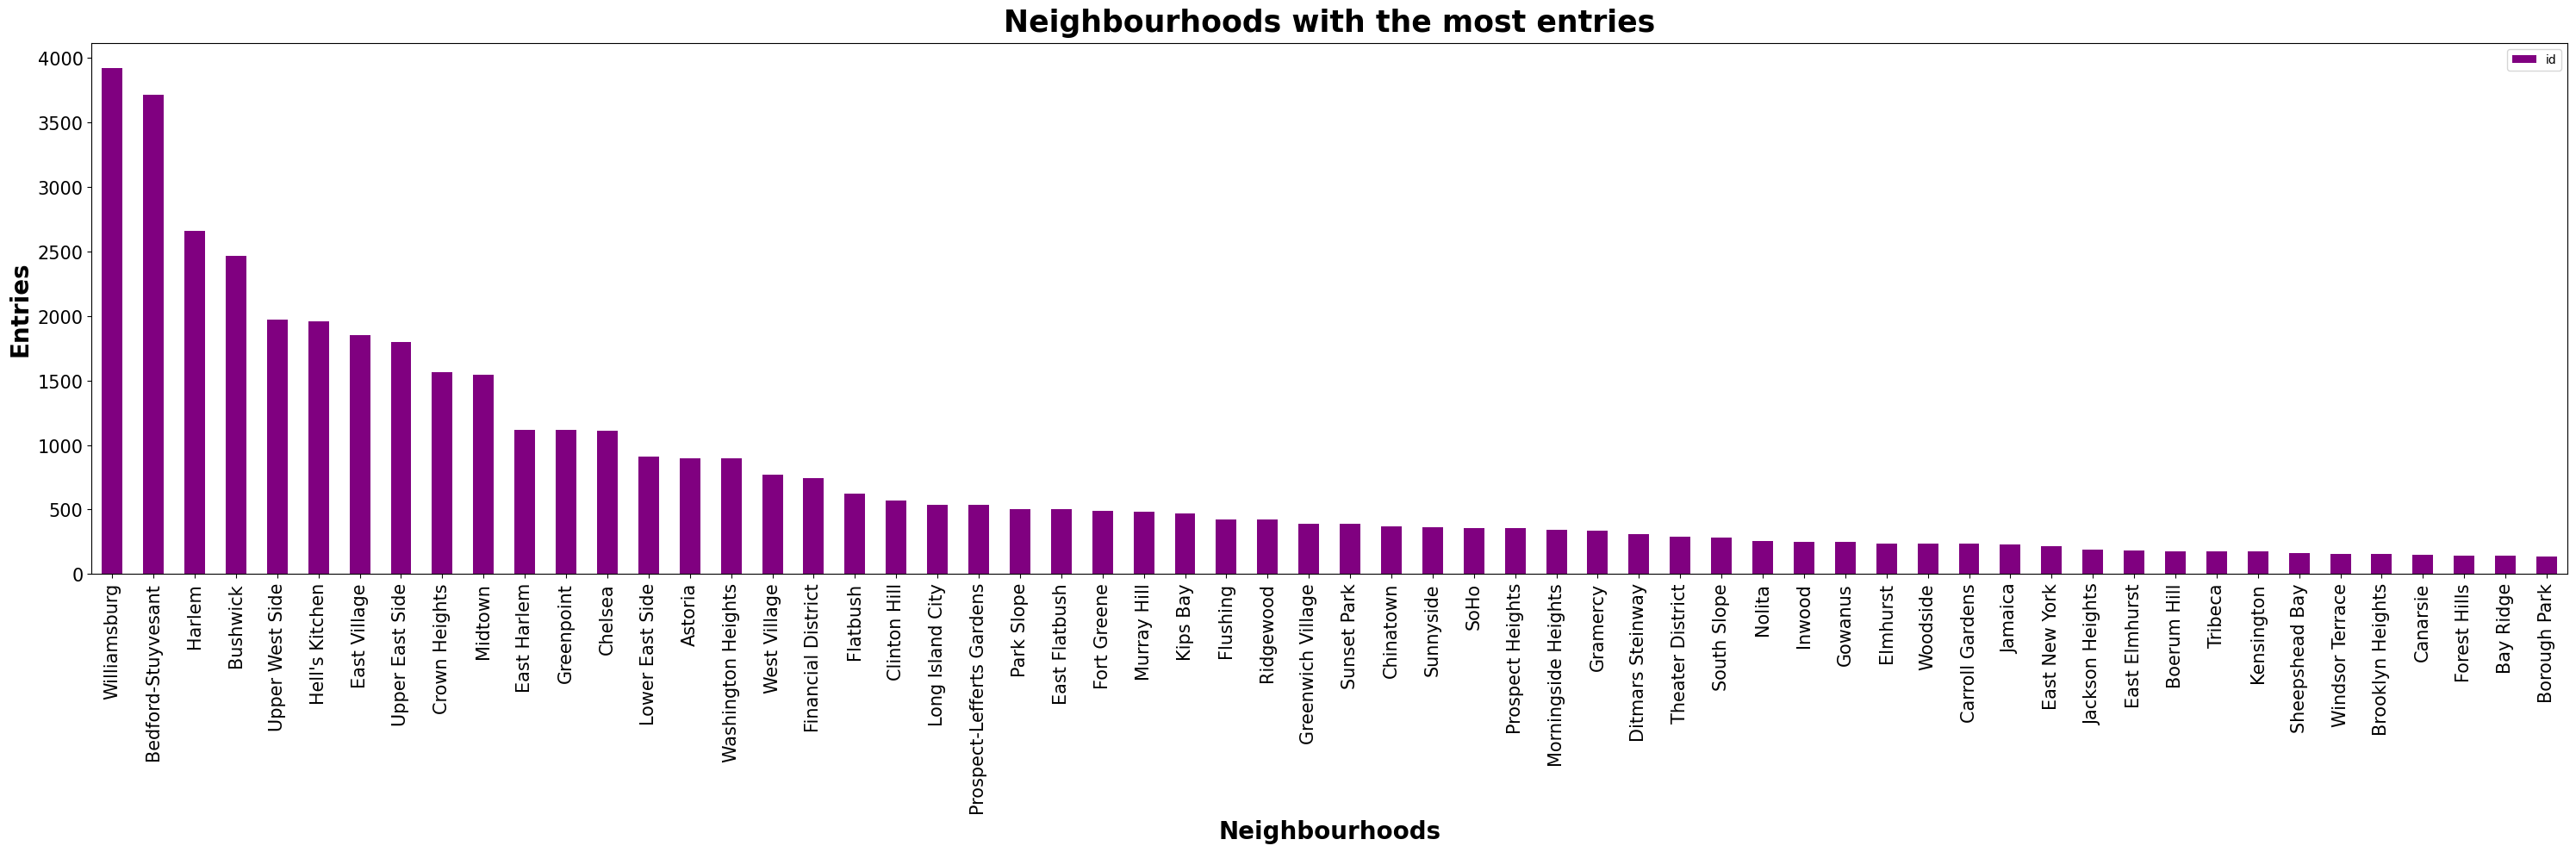

In [31]:
neighbourhood_df = airbnb_df.groupby(by=['neighbourhood'], as_index=False).agg({'id':'nunique'}).sort_values('id', ascending=False, ignore_index=True)
neighbourhood_df.head(60).plot.bar(x='neighbourhood',color='purple',fontsize=15,figsize=(30,10))
plt.title('Neighbourhoods with the most entries',fontweight='bold',fontsize=25,pad=10)
plt.ylabel('Entries',fontweight='bold',fontsize=20)
plt.xlabel('Neighbourhoods',fontweight='bold',fontsize=20)
plt.tight_layout()
plt.show()

Word cloud of the words used names of the Airbnb


In [34]:
!pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------- ----------------------------- 41.0/151.4 kB ? eta -:--:--
   ---------- ----------------------------- 41.0/151.4 kB ? eta -:--:--
   ---------- ----------------------------- 41.0/151.4 kB ? eta -:--:--
   ---------- ----------------------------- 41.0/151.4 kB ? eta -:--:--
   ---------- ----------------------------- 41.0/151.4 kB ? eta -:--:--
   --------------- ----------------------- 61.4/151.4 kB 192.5 kB/s eta 0:00:01
   ------------------------------ ------- 122.9/151.4 kB 300.4 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/151.4 kB 303.9 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/151.4 kB 303.9 kB/s eta 0:00:01
   ----------------------------------

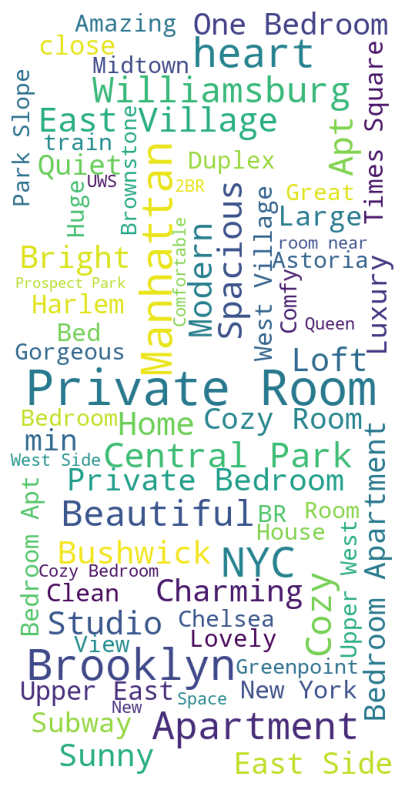

In [36]:
from wordcloud import WordCloud
name1 = " ".join(str(w) for w in airbnb_df.name)
plt.subplots(figsize=(25,10))
wordcloud = WordCloud(background_color='white',height=1000,
                     width=500,max_words=70).generate(name1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

What are the neighbourhoods or the neighbourhood groups where the owners are preffering longer stays rather than one shorter inn type stays?

In [37]:
airbnb_df.groupby('neighbourhood')['minimum_nights'].mean()

neighbourhood
Allerton            2.214286
Arden Heights       9.500000
Arrochar            2.761905
Arverne             1.649351
Astoria             6.036667
                     ...    
Windsor Terrace     8.713376
Woodhaven           2.795455
Woodlawn            1.454545
Woodrow             7.000000
Woodside           10.314894
Name: minimum_nights, Length: 221, dtype: float64

In [38]:
airbnb_df.groupby('neighbourhood_group')['minimum_nights'].mean()

neighbourhood_group
Bronx            4.560953
Brooklyn         6.056556
Manhattan        8.579151
Queens           5.181433
Staten Island    4.831099
Name: minimum_nights, dtype: float64

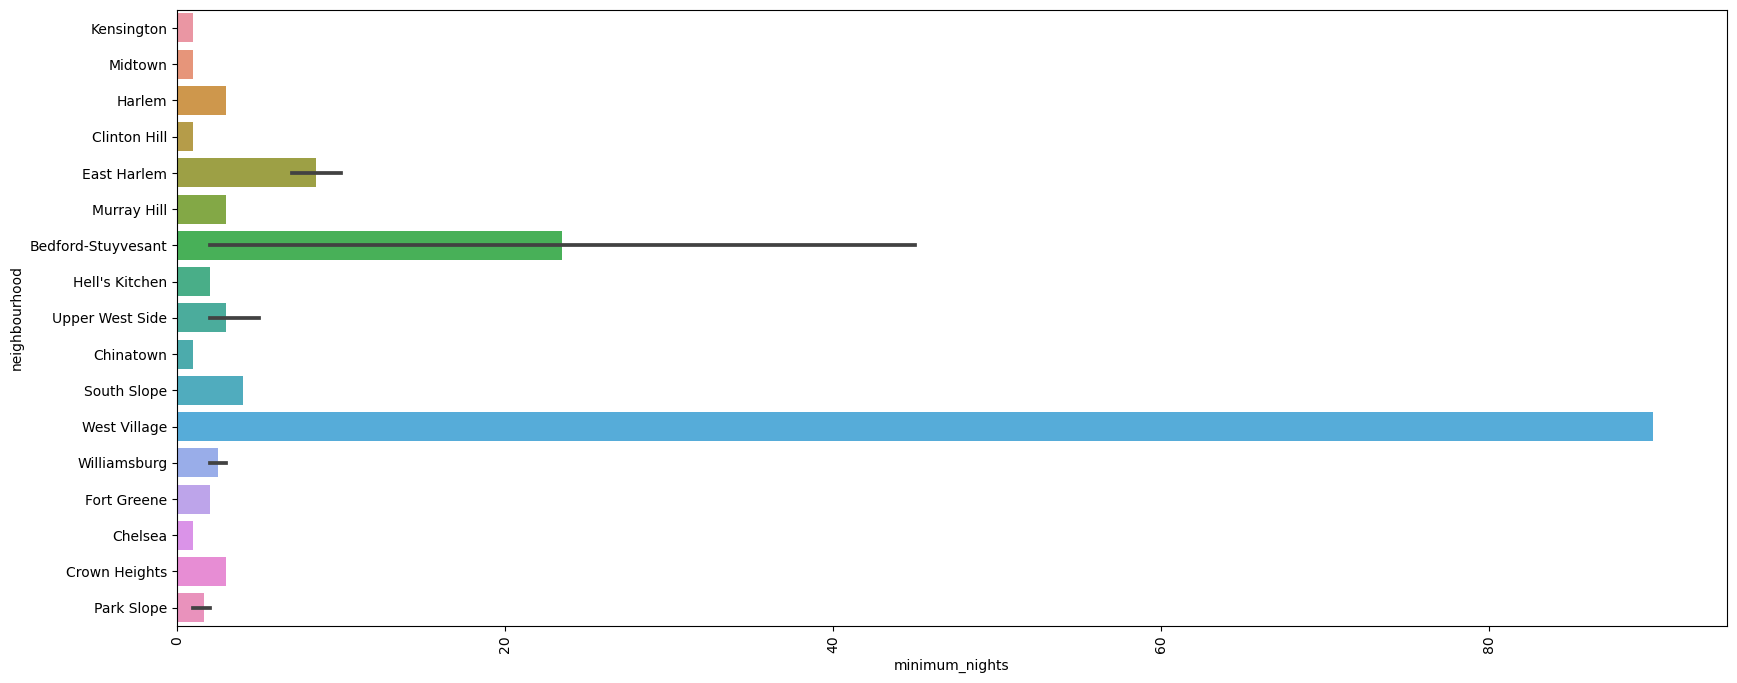

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(x=airbnb_df.minimum_nights[:25], y=airbnb_df.neighbourhood[:25])
plt.xticks(rotation=90)
plt.show()

In [42]:
airbnb_df.groupby('room_type')['minimum_nights'].mean()

room_type
Entire home/apt    8.506907
Private room       5.377900
Shared room        6.475000
Name: minimum_nights, dtype: float64

If airbnb wants to start their own set of apartment type(OYO townhouse) places what place is the best for the company?

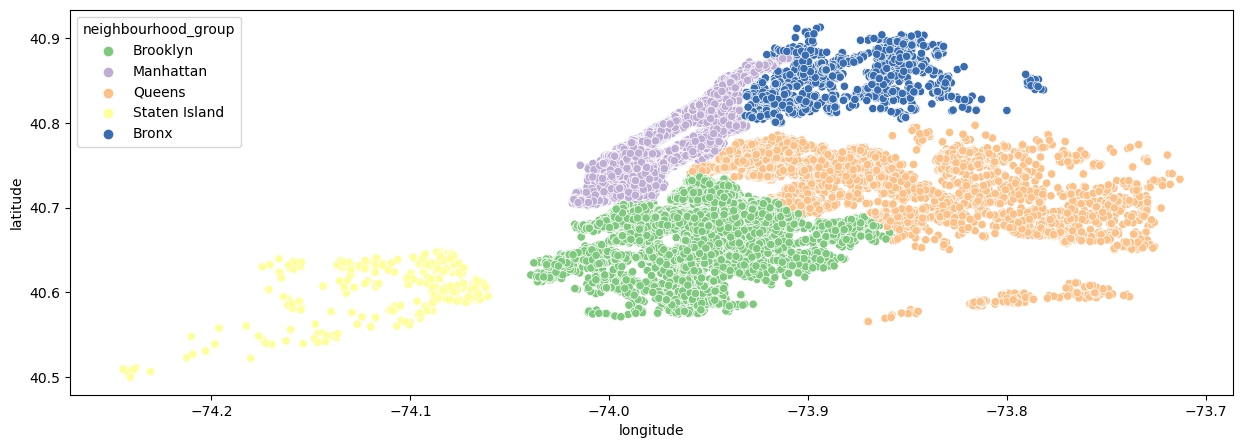

In [44]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=airbnb_df.longitude, y=airbnb_df.latitude,
              hue=airbnb_df.neighbourhood_group,palette='Accent')
plt.show()

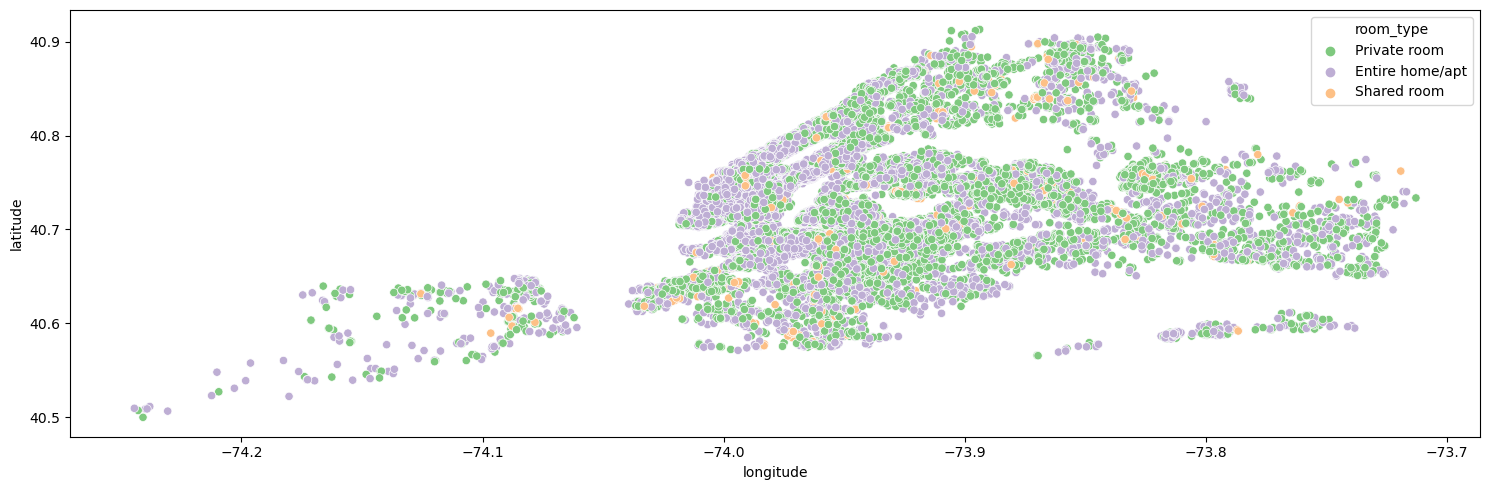

In [46]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=airbnb_df.longitude, y=airbnb_df.latitude,
                hue=airbnb_df.room_type,palette='Accent')
plt.tight_layout()
plt.show()